# Importing datasets from Data_prep.ipynb

In [1]:
# Importing modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import opendatasets as od

Setting up datasets

In [2]:
air_and_water = pd.read_csv('https://raw.githubusercontent.com/markriis/IDS-pollution-of-cities/main/cities_air_quality_water_pollution2021.csv')

gasses = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv',
                     usecols=['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
       'other_industry_co2', 'primary_energy_consumption',
       'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2',
       'trade_co2_share'])# Removed some columns that I doubt would be of use, meanings at https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv

air = pd.read_excel('https://cdn.who.int/media/docs/default-source/air-pollution-documents/air-quality-and-health/who_aap_2021_v9_11august2022.xlsx?sfvrsn=9035996c_3',
                    storage_options={'User-Agent': 'Mozilla/5.0'}, sheet_name='AAP_2022_city_v9',
                    usecols=['ISO3', 'WHO Country Name', 'City or Locality', 'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
                             'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)', 'NO2 temporal coverage (%)', 'Version of the database'])

development = pd.read_csv('https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Composite_indices_complete_time_series.csv',
                          storage_options={'User-Agent': 'Mozilla/5.0'})# This has 1008 features so were going to have to figure out what to use and what not

dataset_url = 'https://public.opendatasoft.com/explore/dataset/geonames-all-cities-with-a-population-1000/download/?format=csv&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B'
od.download(dataset_url)# This one takes a while

populations = pd.read_csv('./geonames-all-cities-with-a-population-1000.csv', delimiter=';',
                          usecols=['Name', 'ASCII Name', 'Country name EN', 'Population', 'Modification date'])

Using downloaded and verified file: .\geonames-all-cities-with-a-population-1000.csv


# Collecting each dataset, seeing what they provide

In [3]:
datasets = {
    'air_and_water' : air_and_water,
    'gasses' : gasses,
    'air' : air,
    'development' : development,
    'populations' : populations
}

    
for name, dataset in datasets.items( ):
    stats = dataset.describe( )
        
    columns = stats.columns
    stats.loc[ 'std var (%)' ] = round( stats.loc[ 'std' ] / stats.loc[ 'mean' ] * 100, 4 )
    print( name )
    display( dataset )
    display( stats )

air_and_water


City                 "Region"                    "Country"  \
0        New York City               "New York"   "United States of America"   
1     Washington, D.C.   "District of Columbia"   "United States of America"   
2        San Francisco             "California"   "United States of America"   
3               Berlin                       ""                    "Germany"   
4          Los Angeles             "California"   "United States of America"   
...                ...                      ...                          ...   
3958             Yanbu        "Medina Province"               "Saudi Arabia"   
3959           Cordoba              "Andalusia"                      "Spain"   
3960               Vic              "Catalonia"                      "Spain"   
3961           Segovia       "Castile and Leon"                      "Spain"   
3962       Zamora city       "Castile and Leon"                      "Spain"   

       "AirQuality"   "WaterPollution"  
0         46.816038          49.504950  
1         66.129032          49.107143  
2         60.514019          43.000000  
3         62.364130          28.612717  
4         36.621622          61.299435  
...             ...                ...  
3958       0.000000          50.000000  
3959      85.714286           8.333333  
3960     100.000000           0.000000  
3961     100.000000           0.000000  
3962     100.000000          50.000000  

[3963 rows x 5 columns]

"AirQuality"   "WaterPollution"
count          3963.000000        3963.000000
mean             62.253452          44.635372
std              30.944753          25.663910
min               0.000000           0.000000
25%              37.686567          25.000000
50%              69.444444          50.000000
75%              87.500000          57.719393
max             100.000000         100.000000
std var (%)      49.707700          57.496800

gasses


country  year iso_code  population           gdp  cement_co2  \
0      Afghanistan  1850      AFG   3752993.0           NaN         NaN   
1      Afghanistan  1851      AFG   3767956.0           NaN         NaN   
2      Afghanistan  1852      AFG   3783940.0           NaN         NaN   
3      Afghanistan  1853      AFG   3800954.0           NaN         NaN   
4      Afghanistan  1854      AFG   3818038.0           NaN         NaN   
...            ...   ...      ...         ...           ...         ...   
50593     Zimbabwe  2017      ZWE  14751101.0  2.194784e+10       0.469   
50594     Zimbabwe  2018      ZWE  15052191.0  2.271535e+10       0.558   
50595     Zimbabwe  2019      ZWE  15354606.0           NaN       0.570   
50596     Zimbabwe  2020      ZWE  15669663.0           NaN       0.570   
50597     Zimbabwe  2021      ZWE  15993525.0           NaN       0.570   

       cement_co2_per_capita     co2  co2_including_luc  \
0                        NaN     NaN                NaN   
1                        NaN     NaN                NaN   
2                        NaN     NaN                NaN   
3                        NaN     NaN                NaN   
4                        NaN     NaN                NaN   
...                      ...     ...                ...   
50593                  0.032   9.596             19.086   
50594                  0.037  11.795             20.626   
50595                  0.037  11.115             19.432   
50596                  0.036  10.608             18.485   
50597                  0.036  11.296             18.771   

       co2_including_luc_growth_abs  ...  nitrous_oxide_per_capita  oil_co2  \
0                               NaN  ...                       NaN      NaN   
1                               NaN  ...                       NaN      NaN   
2                               NaN  ...                       NaN      NaN   
3                               NaN  ...                       NaN      NaN   
4                               NaN  ...                       NaN      NaN   
...                             ...  ...                       ...      ...   
50593                        -1.817  ...                     0.354    3.227   
50594                         1.540  ...                     0.353    4.060   
50595                        -1.194  ...                     0.344    3.657   
50596                        -0.946  ...                     0.301    3.317   
50597                         0.285  ...                       NaN    3.501   

       oil_co2_per_capita  other_co2_per_capita  other_industry_co2  \
0                     NaN                   NaN                 NaN   
1                     NaN                   NaN                 NaN   
2                     NaN                   NaN                 NaN   
3                     NaN                   NaN                 NaN   
4                     NaN                   NaN                 NaN   
...                   ...                   ...                 ...   
50593               0.219                   NaN                 NaN   
50594               0.270                   NaN                 NaN   
50595               0.238                   NaN                 NaN   
50596               0.212                   NaN                 NaN   
50597               0.219                   NaN                 NaN   

       primary_energy_consumption  total_ghg  total_ghg_excluding_lucf  \
0                             NaN        NaN                       NaN   
1                             NaN        NaN                       NaN   
2                             NaN        NaN                       NaN   
3                             NaN        NaN                       NaN   
4                             NaN        NaN                       NaN   
...                           ...        ...                       ...   
50593                      45.257     115.00                     27.71   
50594  

year    population           gdp    cement_co2  \
count        50598.000000  4.000800e+04  1.456400e+04  24974.000000   
mean          1925.365173  5.926810e+07  2.677586e+11      8.392491   
std             59.882945  3.222866e+08  2.103151e+12     63.009433   
min           1750.000000  2.100000e+01  4.998000e+07      0.000000   
25%           1882.000000  3.198618e+05  7.516679e+09      0.000000   
50%           1929.000000  2.323117e+06  2.597999e+10      0.010000   
75%           1975.000000  9.802751e+06  1.132942e+11      0.692000   
max           2021.000000  7.909295e+09  1.136302e+14   1672.592000   
std var (%)      3.110200  5.437775e+02  7.854654e+02    750.783500   

             cement_co2_per_capita           co2  co2_including_luc  \
count                 22714.000000  31349.000000       24218.000000   
mean                      0.063958    380.237549         499.312724   
std                       0.123023   1801.527942        2081.497921   
min                       0.000000      0.000000        -187.032000   
25%                       0.000000      0.125000           4.646000   
50%                       0.005000      3.109000          24.417000   
75%                       0.087000     43.730000         113.381250   
max                       2.574000  37123.852000       41639.840000   
std var (%)             192.349000    473.790100         416.872600   

             co2_including_luc_growth_abs  co2_including_luc_growth_prct  \
count                        23917.000000                   24123.000000   
mean                             7.204133                      12.061668   
std                             92.866497                     704.347332   
min                          -2317.996000                  -36941.664000   
25%                             -0.572000                      -3.591000   
50%                              0.062000                       0.909000   
75%                              2.325000                       5.726000   
max                           2246.723000                   76500.000000   
std var (%)                   1289.072500                    5839.551400   

             co2_including_luc_per_capita  ...  nitrous_oxide_per_capita  \
count                        23696.000000  ...               6355.000000   
mean                             7.505342  ...                  0.570777   
std                             17.253371  ...                  0.747627   
min                            -22.414000  ...                  0.000000   
25%                              1.947000  ...                  0.209000   
50%                              4.531500  ...                  0.359000   
75%                              8.998000  ...                  0.582500   
max                            824.457000  ...                  7.127000   
std var (%)                    229.881200  ...                130.984000   

                  oil_co2  oil_co2_per_capita  other_co2_per_capita  \
count        25042.000000         24367.00000           2386.000000   
mean           111.385607             2.20426              0.072525   
std            625.020942            14.91307              0.056749   
min              0.000000             0.00000              0.000000   
25%              0.077000             0.04000              0.024000   
50%              1.235000             0.38500              0.066000   
75%             13.102000             1.97150              0.102000   
max          12345.653000           824.45700              0.348000   
std var (%)    561.132600           676.55670             78.248100   

             other_industry_co2  primary_energy_consumption     total_ghg  \
count               2386.000000                10391.000000   6354.000000   
mean                  18.430048                 2302.953439    790.430981   
std                   41.863198                10665.858425   3610.534250   
min                    0.000000                    0.00000

air


ISO3 WHO Country Name City or Locality  Measurement Year  PM2.5 (μg/m3)  \
0      AFG      Afghanistan            Kabul              2019         119.77   
1      ALB          Albania           Durres              2015            NaN   
2      ALB          Albania           Durres              2016          14.32   
3      ALB          Albania          Elbasan              2015            NaN   
4      ALB          Albania          Elbasan              2016            NaN   
...    ...              ...              ...               ...            ...   
32186  ZAF     South Africa       West Coast              2015           7.47   
32187  ZAF     South Africa       West Coast              2016           8.42   
32188  ZAF     South Africa       West Coast              2017           6.83   
32189  ZAF     South Africa       West Coast              2018           6.10   
32190  ZAF     South Africa        West Rand              2016            NaN   

       PM10 (μg/m3)  NO2 (μg/m3)  PM25 temporal coverage (%)  \
0               NaN          NaN                        18.0   
1             17.65        26.63                         NaN   
2             24.56        24.78                         NaN   
3               NaN        23.96                         NaN   
4               NaN        26.26                         NaN   
...             ...          ...                         ...   
32186         24.64         7.64                        75.0   
32187         33.28         7.27                        75.0   
32188         20.49         8.72                        75.0   
32189         17.99         7.15                        75.0   
32190           NaN        17.85                         NaN   

       PM10 temporal coverage (%)  NO2 temporal coverage (%)  \
0                             NaN                        NaN   
1                             NaN                  83.961187   
2                             NaN                  87.932605   
3                             NaN                  97.853881   
4                             NaN                  96.049636   
...                           ...                        ...   
32186                        75.0                  75.000000   
32187                        75.0                  75.000000   
32188                        75.0                  75.000000   
32189                        75.0                  75.000000   
32190                         NaN                  75.000000   

       Version of the database  
0                         2022  
1                         2022  
2                         2022  
3                         2022  
4                         2022  
...                        ...  
32186                     2022  
32187                     2022  
32188                     2022  
32189                     2022  
32190                     2022  

[32191 rows x 11 columns]

Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)   NO2 (μg/m3)  \
count            32191.000000   15048.000000  21109.000000  22200.000000   
mean              2015.579354      22.920320     30.533252     20.619336   
std                  2.752654      17.925906     29.312756     12.133388   
min               2000.000000       0.010000      1.040000      0.000000   
25%               2014.000000      10.350000     16.980000     12.000000   
50%               2016.000000      16.000000     22.000000     18.800000   
75%               2018.000000      31.000000     31.300000     27.160000   
max               2021.000000     191.900000    540.000000    210.680000   
std var (%)          0.136600      78.209700     96.002700     58.844700   

             PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
count                       7275.000000                 5381.000000   
mean                          90.794096                   90.583500   
std                           14.872681                   13.816311   
min                            0.000000                    2.568493   
25%                           88.595890                   87.945205   
50%                           97.000000                   96.039000   
75%                           99.000000                   98.938000   
max                          100.000000                  100.000000   
std var (%)                   16.380700                   15.252600   

             NO2 temporal coverage (%)  Version of the database  
count                     19890.000000             32191.000000  
mean                         93.696804              2021.744214  
std                          10.451751                 1.051897  
min                           1.923077              2016.000000  
25%                          93.207763              2022.000000  
50%                          96.369863              2022.000000  
75%                          98.926941              2022.000000  
max                         100.000000              2022.000000  
std var (%)                  11.154900                 0.052000

development


iso3                          country    hdicode region  \
0          AFG                      Afghanistan        Low     SA   
1          AGO                           Angola     Medium    SSA   
2          ALB                          Albania       High    ECA   
3          AND                          Andorra  Very High    NaN   
4          ARE             United Arab Emirates  Very High     AS   
..         ...                              ...        ...    ...   
201    ZZG.ECA          Europe and Central Asia        NaN    NaN   
202    ZZH.LAC  Latin America and the Caribbean        NaN    NaN   
203     ZZI.SA                       South Asia        NaN    NaN   
204    ZZJ.SSA               Sub-Saharan Africa        NaN    NaN   
205  ZZK.WORLD                            World        NaN    NaN   

     hdi_rank_2021  hdi_1990  hdi_1991  hdi_1992  hdi_1993  hdi_1994  ...  \
0            180.0     0.273     0.279     0.287     0.297     0.292  ...   
1            148.0       NaN       NaN       NaN       NaN       NaN  ...   
2             67.0     0.647     0.629     0.614     0.617     0.624  ...   
3             40.0       NaN       NaN       NaN       NaN       NaN  ...   
4             26.0     0.728     0.739     0.742     0.748     0.755  ...   
..             ...       ...       ...       ...       ...       ...  ...   
201            NaN     0.664     0.661     0.654     0.652     0.647  ...   
202            NaN     0.633     0.638     0.643     0.648     0.654  ...   
203            NaN     0.442     0.447     0.453     0.457     0.462  ...   
204            NaN     0.407     0.410     0.410     0.411     0.413  ...   
205            NaN     0.601     0.604     0.607     0.610     0.614  ...   

       mf_2012    mf_2013    mf_2014    mf_2015    mf_2016    mf_2017  \
0     1.860000   1.880000   1.660000   1.620000   1.660000   1.410000   
1     4.090000   4.530000   3.970000   3.590000   2.790000   2.640000   
2    12.440000  11.490000  13.140000  12.610000  14.390000  14.460000   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4    49.560000  49.680000  55.490000  59.760000  64.950000  75.610000   
..         ...        ...        ...        ...        ...        ...   
201  13.107171  14.172082  14.189127  14.523162  13.791770  13.618078   
202  14.114108  14.493145  14.080904  14.146026  13.325144  13.604555   
203   4.699407   4.584935   4.486500   4.610546   4.624886   4.740263   
204   3.437760   3.530479   3.491150   3.494860   3.415511   3.256156   
205  12.186601  12.474065  12.520563  12.372667  12.277707  12.277878   

       mf_2018    mf_2019    mf_2020    mf_2021  
0     1.320000   1.380000   1.380000   1.380000  
1     2.280000   2.180000   2.180000   2.180000  
2    12.850000  12.960000  12.960000  12.960000  
3          NaN        NaN        NaN        NaN  
4    65.970000  68.950000  68.950000  68.950000  
..         ...        ...        ...        ...  
201  13.914030  14.087293  14.091826  14.096719  
202  13.151315  13.296195  13.290914  13.284745  
203   5.000024   5.110230   5.106447   5.102134  
204   3.145930   3.151076   3.146092   3.140740  
205  12.220286  12.375236  12.325166  12.271920  

[206 rows x 1008 columns]

hdi_rank_2021    hdi_1990    hdi_1991    hdi_1992    hdi_1993  \
count           191.000000  152.000000  152.000000  152.000000  152.000000   
mean             95.811518    0.595112    0.597862    0.600493    0.604474   
std              55.307333    0.161918    0.161921    0.162193    0.163122   
min               1.000000    0.216000    0.218000    0.222000    0.227000   
25%              48.500000    0.477750    0.477000    0.475250    0.474250   
50%              96.000000    0.621500    0.623500    0.622000    0.624000   
75%             143.500000    0.725500    0.727000    0.723750    0.724250   
max             191.000000    0.872000    0.873000    0.878000    0.880000   
std var (%)      57.725100   27.208000   27.083300   27.010000   26.985800   

               hdi_1994    hdi_1995    hdi_1996    hdi_1997    hdi_1998  ...  \
count        152.000000  163.000000  163.000000  163.000000  163.000000  ...   
mean           0.609329    0.613908    0.619663    0.624975    0.630417  ...   
std            0.163818    0.162789    0.163461    0.164299    0.165177  ...   
min            0.232000    0.238000    0.243000    0.248000    0.256000  ...   
25%            0.476500    0.480500    0.488500    0.490000    0.492000  ...   
50%            0.623500    0.642000    0.650000    0.651000    0.657000  ...   
75%            0.733750    0.737000    0.743000    0.752500    0.759000  ...   
max            0.884000    0.885000    0.887000    0.890000    0.895000  ...   
std var (%)   26.885000   26.516900   26.379100   26.288900   26.201300  ...   

                mf_2012     mf_2013     mf_2014     mf_2015     mf_2016  \
count        168.000000  168.000000  168.000000  168.000000  168.000000   
mean          15.249784   15.385926   15.347629   15.352632   15.342119   
std           14.134572   14.555342   14.363092   14.680340   15.015809   
min            0.430000    0.420000    0.450000    0.560000    0.600000   
25%            4.597500    4.525000    4.452375    4.457500    4.517500   
50%           10.907725   11.272314   10.745000   10.260000   10.590000   
75%           20.345000   20.397500   20.227500   20.187500   19.350000   
max           74.560000   82.970000   81.100000   86.780000   83.510000   
std var (%)   92.687000   94.601700   93.585100   95.621000   97.873100   

                mf_2017     mf_2018     mf_2019     mf_2020     mf_2021  
count        168.000000  168.000000  168.000000  168.000000  168.000000  
mean          15.491780   14.597416   14.776332   14.775408   14.774396  
std           15.333709   13.581871   14.266308   14.266504   14.266706  
min            0.610000    0.500000    0.470000    0.470000    0.470000  
25%            4.575000    4.612500    4.732500    4.732500    4.732500  
50%           10.895000   11.215000   11.030000   11.030000   11.030000  
75%           19.757500   18.432500   17.932500   17.932500   17.932500  
max           88.700000   71.160000   85.700000   85.700000   85.700000  
std var (%)   98.979600   93.043000   96.548400   96.555700   96.563700  

[9 rows x 1004 columns]

populations


Name              ASCII Name Country name EN  \
0                    Fiumicino               Fiumicino           Italy   
1             Figline Valdarno        Figline Valdarno           Italy   
2                     Ficarolo                Ficarolo           Italy   
3       Ferrara di Monte Baldo  Ferrara di Monte Baldo           Italy   
4                    Felizzano               Felizzano           Italy   
...                        ...                     ...             ...   
141179                 Sóc Sơn                 Soc Son        Viet Nam   
141180              Thống Nhất              Thong Nhat        Viet Nam   
141181                Hoàng Sa                Hoang Sa        Viet Nam   
141182                Hoàng Sa                Hoang Sa        Viet Nam   
141183              Quang Minh              Quang Minh        Viet Nam   

        Population Modification date  
0            34556        2022-11-17  
1            13287        2019-10-24  
2             2007        2014-04-13  
3               89        2014-04-13  
4             2276        2014-01-11  
...            ...               ...  
141179           0        2023-06-26  
141180           0        2023-06-26  
141181           0        2017-04-04  
141182           0        2020-05-24  
141183       25000        2023-06-26  

[141184 rows x 5 columns]

Population
count        1.411840e+05
mean         2.582924e+04
std          2.333119e+05
min          0.000000e+00
25%          1.284000e+03
50%          2.973500e+03
75%          9.797000e+03
max          2.231547e+07
std var (%)  9.032859e+02

Seeing how big our datasets are

In [4]:
for name, dataset in datasets.items( ):
    print( f'{name} - { len( dataset ) }' )

air_and_water - 3963
gasses - 50598
air - 32191
development - 206
populations - 141184


# Data cleaning

Starting with air quality and water pollution

In [5]:
# Cleaning the column names
# Old: Index(['City', ' "Region"', ' "Country"', ' "AirQuality"', ' "WaterPollution"'],

new_cols = {
    'City' : 'City',
    ' "Region"' : 'Region',
    ' "Country"' : 'Country',
    ' "AirQuality"' : 'AirQuality',
    ' "WaterPollution"' : 'WaterPollution'
}

air_and_water.columns = [ new_cols[ col ] for col in air_and_water.columns ]
print( air_and_water.columns )

Index(['City', 'Region', 'Country', 'AirQuality', 'WaterPollution'], dtype='object')


In [10]:
# Grouping data by country
air_and_water[ 'AirQuality' ] = pd.to_numeric( air_and_water[ 'AirQuality' ] )
air_and_water[ 'WaterPollution' ] = pd.to_numeric( air_and_water[ 'WaterPollution' ] )

air_and_water_country = air_and_water.groupby( 'Country' ).agg(
    {
        'AirQuality' : 'median',
        'WaterPollution' : 'median'
    }
)

# Remove the " from country names
air_and_water_country.index = air_and_water_country.index.str.replace( '"', '' )
print( air_and_water_country.isna( ).sum( ) )

air_and_water_country # Were done cleaning this dataset

AirQuality        0
WaterPollution    0
dtype: int64


AirQuality  WaterPollution
Country                                 
 Afghanistan   31.085526       62.500000
 Albania       58.333333       62.500000
 Algeria       50.000000       50.000000
 Andorra       43.750000       25.000000
 Angola        15.000000       81.250000
...                  ...             ...
 Venezuela     25.000000       95.714286
 Vietnam       50.961538       66.346154
 Yemen         29.166667       83.333333
 Zambia        54.166667       99.038462
 Zimbabwe      44.230769       73.214286

[177 rows x 2 columns]



Also repeat the same process with gasses dataframe

index  year
86    2021   271
170   2020   271
63    2019   271
62    2018   271
61    2017   271
60    2016   271
59    2015   271
58    2014   271
57    2013   271
56    2012   271
55    2011   271
54    2010   271
53    2009   271
52    2008   271
51    2007   271
50    2006   271
49    2005   271
48    2004   271
47    2003   271
64    2002   271
65    2001   271
66    2000   271
76    1999   271
83    1998   271
82    1997   271
81    1996   271
80    1995   271
79    1994   271
78    1993   271
77    1992   271
31    1991   272
75    1990   271

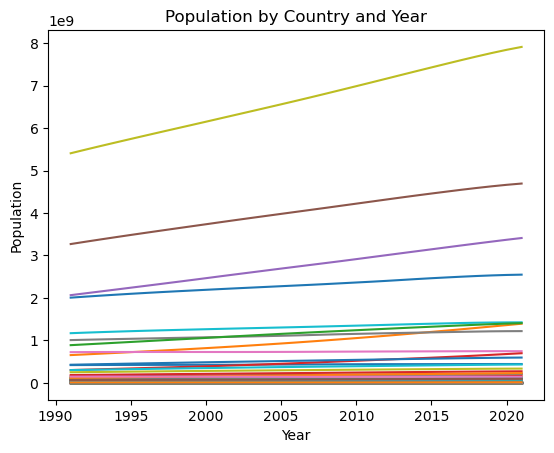

Country  Afghanistan        Africa  Africa (GCP)  Aland Islands    Albania  \
Year                                                                         
1991      10745168.0  6.550409e+08           0.0            0.0  3302087.0   
1992      12057436.0  6.719318e+08           0.0            0.0  3303738.0   
1993      14003764.0  6.891403e+08           0.0            0.0  3300715.0   
1994      15455560.0  7.064886e+08           0.0            0.0  3294001.0   
1995      16418911.0  7.243320e+08           0.0            0.0  3284370.0   
1996      17106600.0  7.427651e+08           0.0            0.0  3271336.0   
1997      17788818.0  7.612248e+08           0.0            0.0  3253721.0   
1998      18493134.0  7.799083e+08           0.0            0.0  3232185.0   
1999      19262854.0  7.990996e+08           0.0            0.0  3208265.0   
2000      19542986.0  8.189524e+08           0.0            0.0  3182027.0   
2001      19688634.0  8.394641e+08           0.0            0.0  3153615.0   
2002      21000258.0  8.606118e+08           0.0            0.0  3123554.0   
2003      22645136.0  8.823496e+08           0.0            0.0  3092993.0   
2004      23553554.0  9.047816e+08           0.0            0.0  3062629.0   
2005      24411196.0  9.278984e+08           0.0            0.0  3032636.0   
2006      25442946.0  9.517406e+08           0.0            0.0  3003391.0   
2007      25903306.0  9.764617e+08           0.0            0.0  2976089.0   
2008      26427204.0  1.001982e+09           0.0            0.0  2951690.0   
2009      27385310.0  1.028201e+09           0.0            0.0  2930553.0   
2010      28189672.0  1.055234e+09           0.0            0.0  2913402.0   
2011      29249156.0  1.082676e+09           0.0            0.0  2900660.0   
2012      30466484.0  1.110797e+09           0.0            0.0  2892191.0   
2013      31541216.0  1.140181e+09           0.0            0.0  2887019.0   
2014      32716214.0  1.170299e+09           0.0            0.0  2884100.0   
2015      33753500.0  1.201108e+09           0.0            0.0  2882482.0   
2016      34636212.0  1.232112e+09           0.0            0.0  2881064.0   
2017      35643420.0  1.263334e+09           0.0            0.0  2879361.0   
2018      36686788.0  1.295265e+09           0.0            0.0  2877019.0   
2019      37769496.0  1.327701e+09           0.0            0.0  2873883.0   
2020      38972236.0  1.360677e+09           0.0            0.0  2866850.0   
2021      40099460.0  1.393677e+09           0.0            0.0  2854710.0   

Country     Algeria  American Samoa  Andorra      Angola  Anguilla  ...  \
Year                                                                ...   
1991     26133906.0         49016.0  55455.0  12228698.0    8638.0  ...   
1992     26748302.0         50096.0  57305.0  12632509.0    8911.0  ...   
1993     27354326.0         51195.0  59177.0  13038277.0    9144.0  ...   
1994     27937006.0         52311.0  61057.0  13462032.0    9381.0  ...   
1995     28478024.0         53421.0  62944.0  13912258.0    9625.0  ...   
1996     28984640.0         54523.0  64166.0  14383352.0    9886.0  ...   
1997     29476030.0         55595.0  64702.0  14871148.0   10152.0  ...   
1998     29924664.0         56626.0  65204.0  15366866.0   10438.0  ...   
1999     30346086.0         57617.0  65675.0  15870759.0   10744.0  ...   
2000     30774624.0         58251.0  66116.0  16394067.0   11071.0  ...   
2001     31200984.0         58342.0  67841.0  16941584.0   11367.0  ...   
2002     31624700.0         58200.0  70868.0  17516140.0   11583.0  ...   
2003     32055882.0         57962.0  73929.0  18124346.0   11761.0  ...   
2004     32510184.0         57653.0  76950.0  18771128.0   11957.0  ...   
2005     32956690.0         57277.0  79845.0  19450962.0   12149.0  ...   
2006     33435082.0         56857.0  80241.0  20162338.0   12347.0  ...   
2007     33983836.0         56402.0  78187.0  20909692.0   12546.0  ...   


In [36]:
# Check how many unique years there are, were only looking for data after 1990 (hdi dataset low range)
# latest year is 2021 so we het first 2021 - 1990 = 31 entries + 1 = 32
display( gasses[ 'year' ].value_counts( ).reset_index( ).sort_values( by='index', ascending=False ).head( 32 ) )

# iso_code isnt needed
gasses.drop( columns=[ 'iso_code' ] )

# Fill NaN's with 0
gasses = gasses.fillna( 0 )


# Visualise the population growth by year for each country, starting from the year 1990
filtered_gasses = gasses[ ( gasses[ 'year' ] > 1990 ) ]
grouped = filtered_gasses.groupby([ 'country', 'year' ])

data = [ ]
for name, group in grouped:
    country, year = name
    population = group[ 'population' ].mean( )
    data.append(( year, country, population ))

populations = pd.DataFrame( data, columns=[ 'Year', 'Country', 'Population' ]).pivot( index='Year', columns='Country', values='Population' )
    
# Show the populations
populations.plot( kind='line' )
plt.title( 'Population by Country and Year' )
plt.xlabel( 'Year' )
plt.ylabel( 'Population' )
plt.legend( ).remove( ) # too big, only want to see generalized data
plt.show()

populations

Generated historical data for gdp, access the dataframe with `gasses_yearly_data["gdp"]`
Generated historical data for cement_co2, access the dataframe with `gasses_yearly_data["cement_co2"]`
Generated historical data for cement_co2_per_capita, access the dataframe with `gasses_yearly_data["cement_co2_per_capita"]`
Generated historical data for co2, access the dataframe with `gasses_yearly_data["co2"]`
Generated historical data for co2_including_luc, access the dataframe with `gasses_yearly_data["co2_including_luc"]`
Generated historical data for co2_including_luc_growth_abs, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_abs"]`
Generated historical data for co2_including_luc_growth_prct, access the dataframe with `gasses_yearly_data["co2_including_luc_growth_prct"]`
Generated historical data for co2_including_luc_per_capita, access the dataframe with `gasses_yearly_data["co2_including_luc_per_capita"]`
Generated historical data for co2_including_luc_per_gdp, a

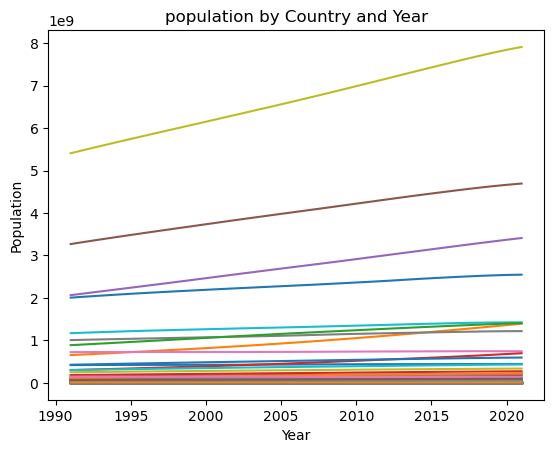

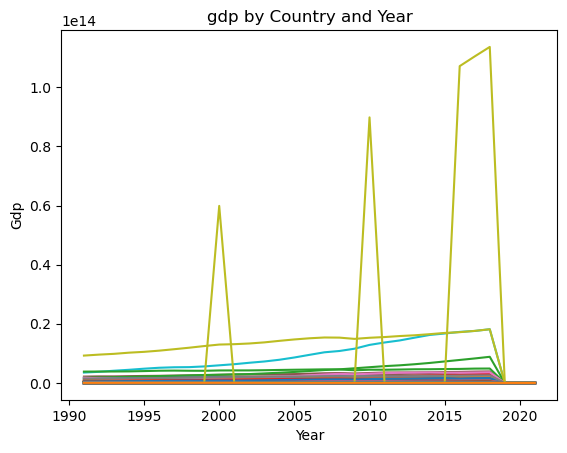

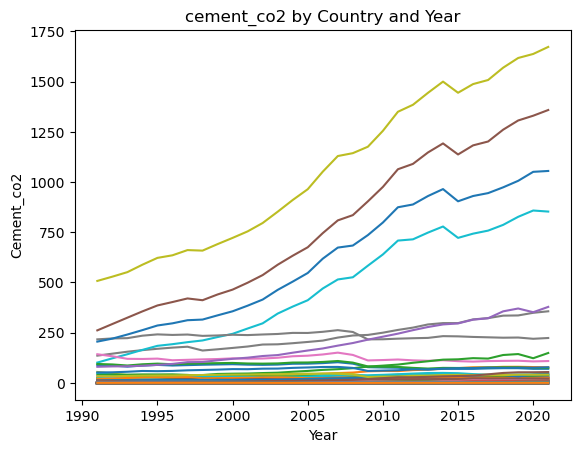

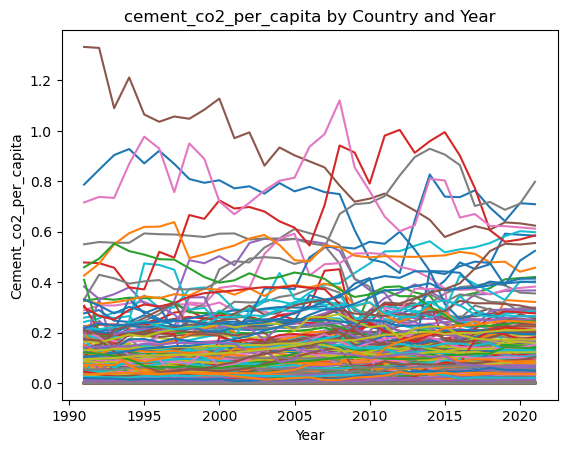

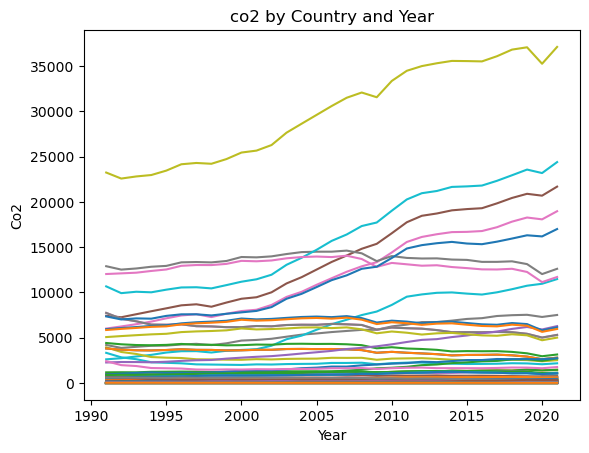

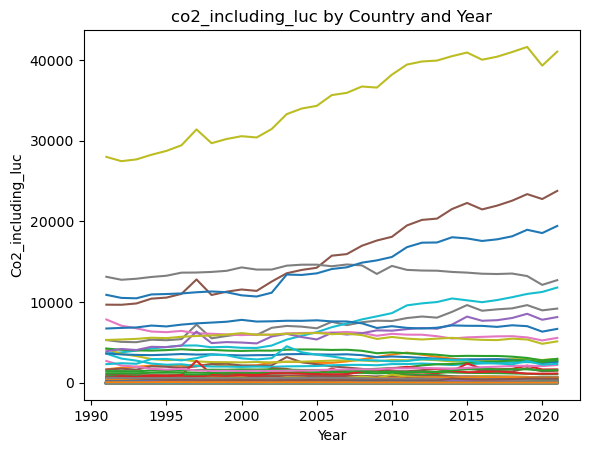

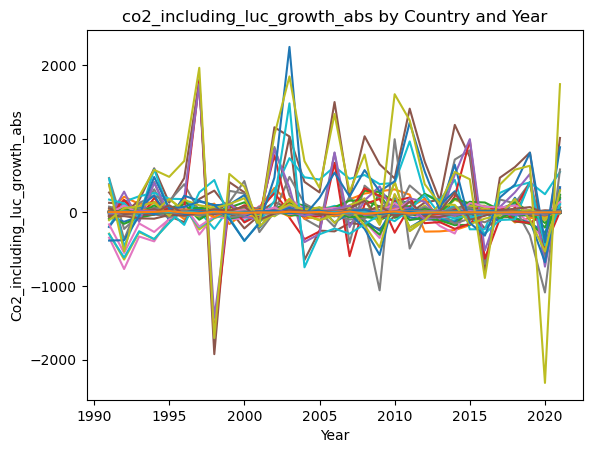

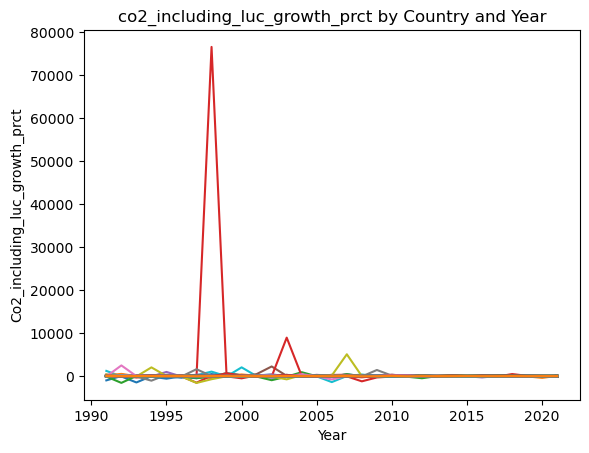

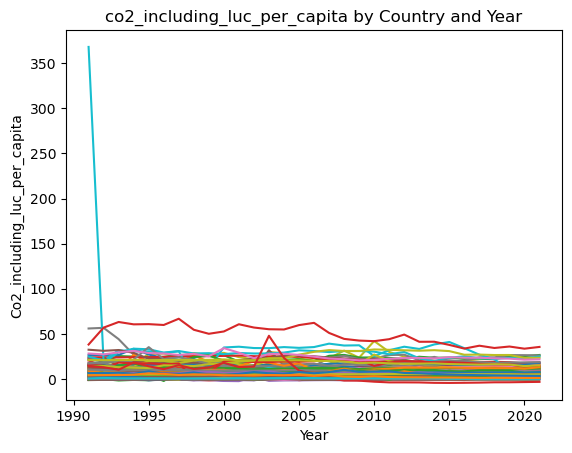

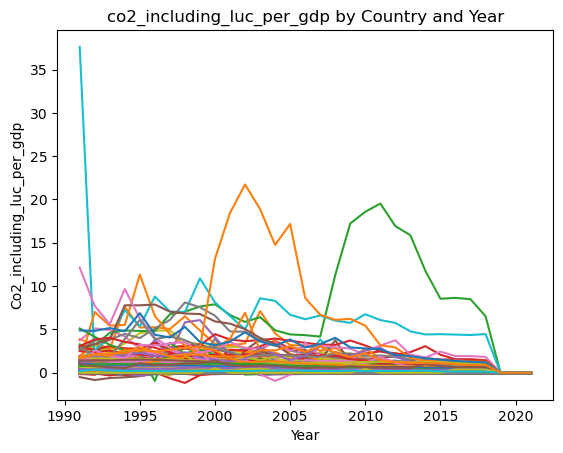

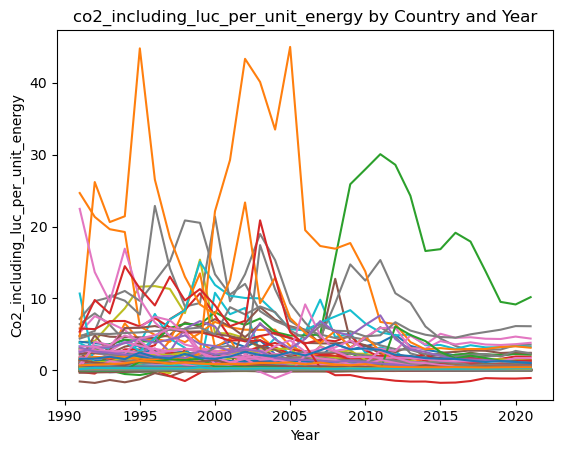

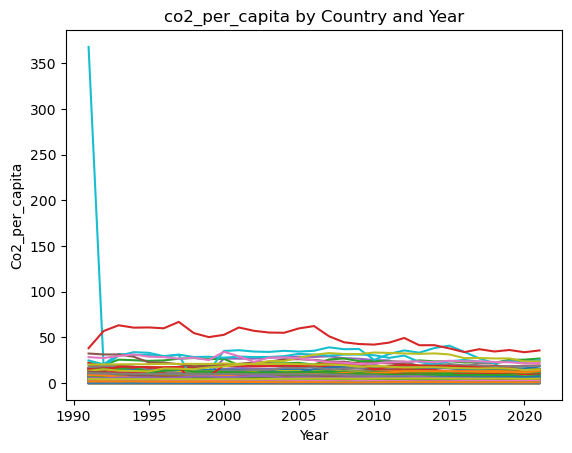

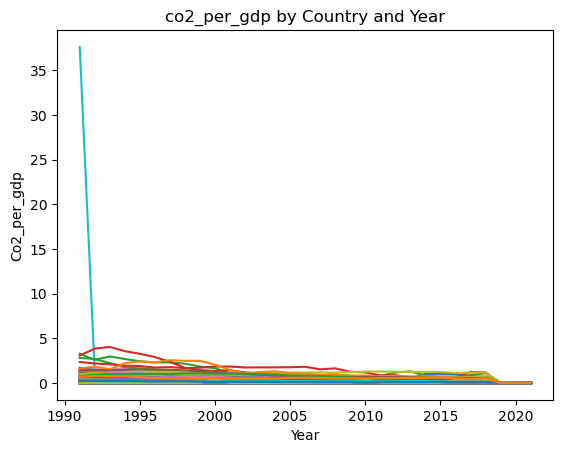

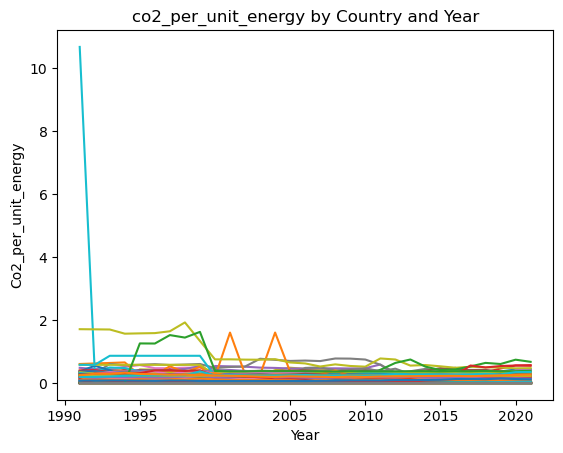

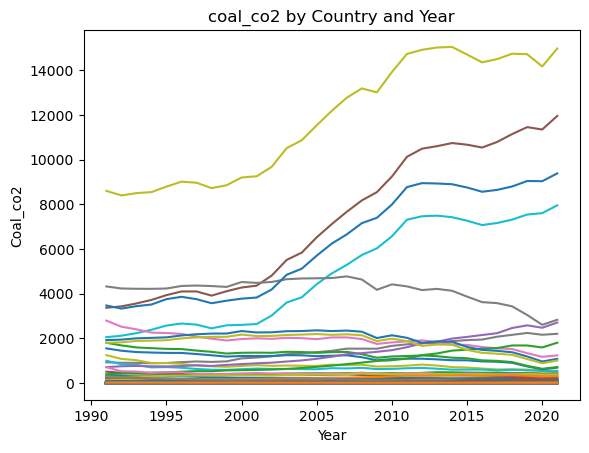

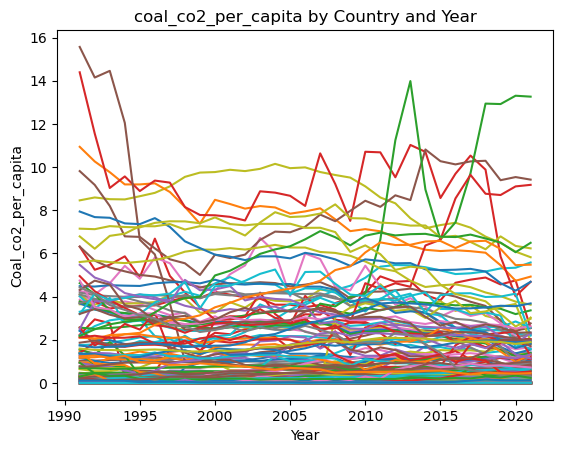

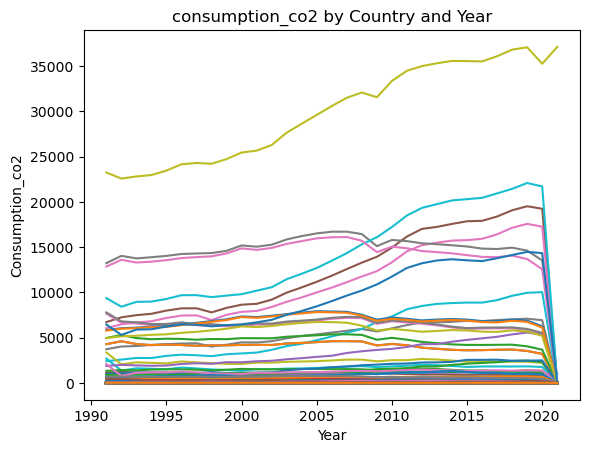

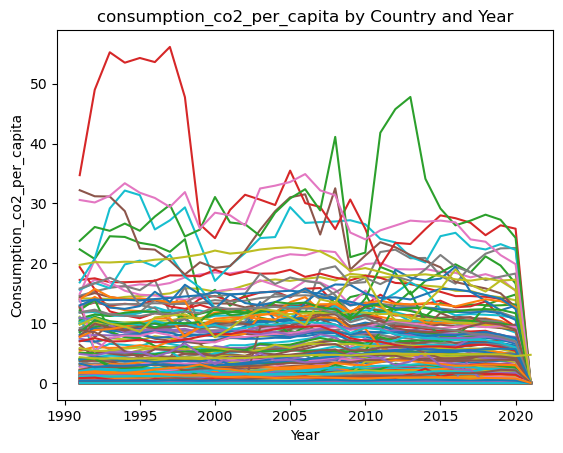

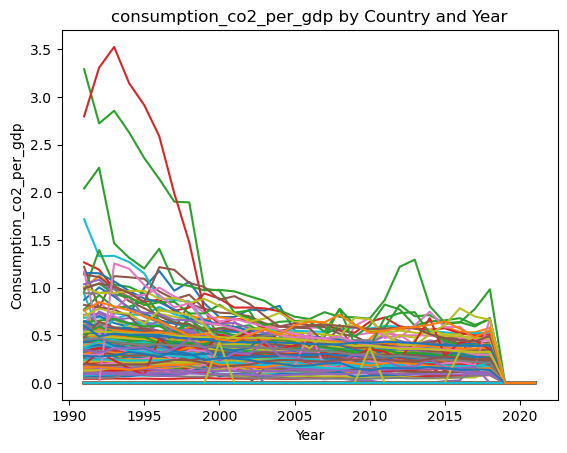

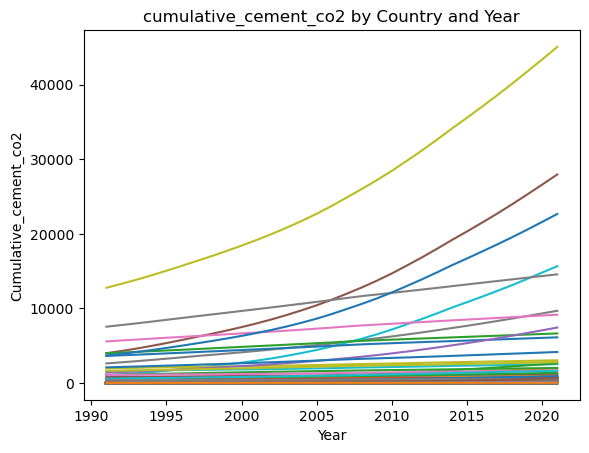

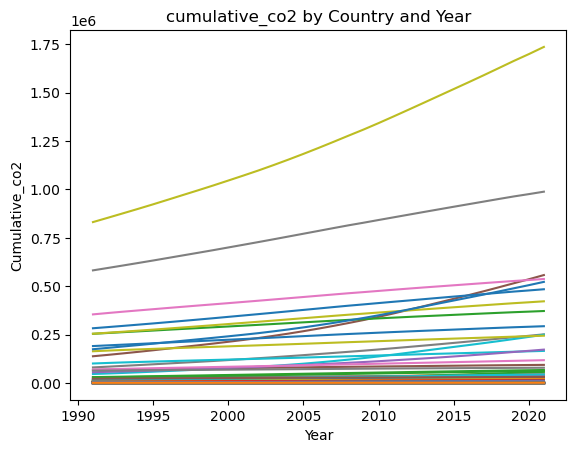

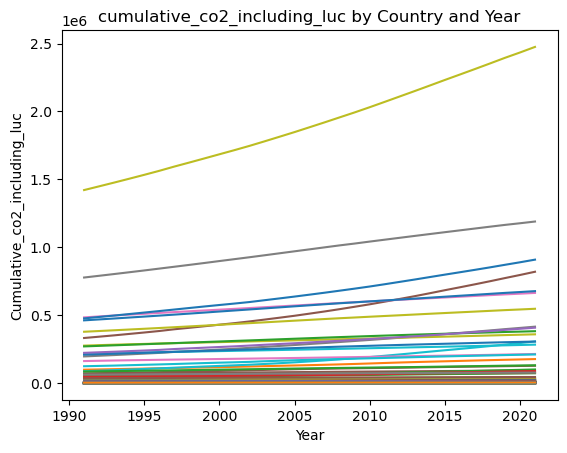

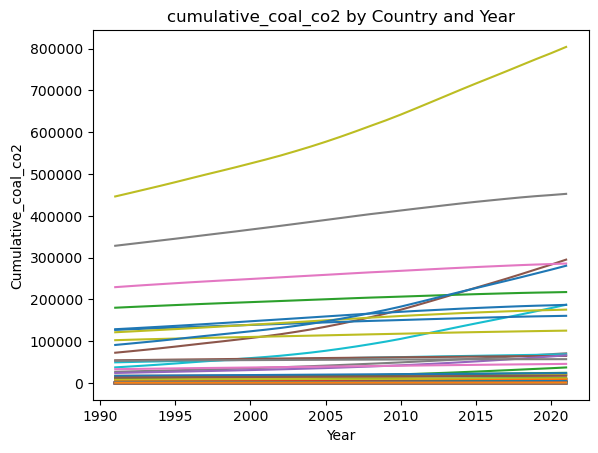

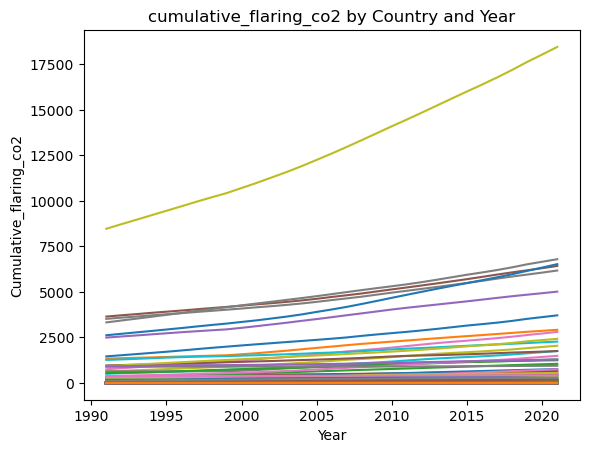

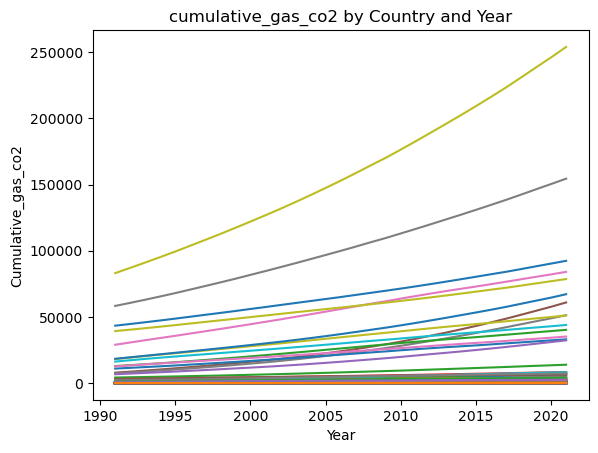

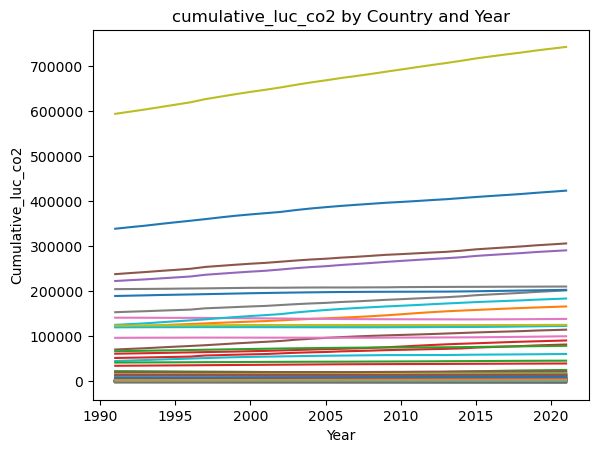

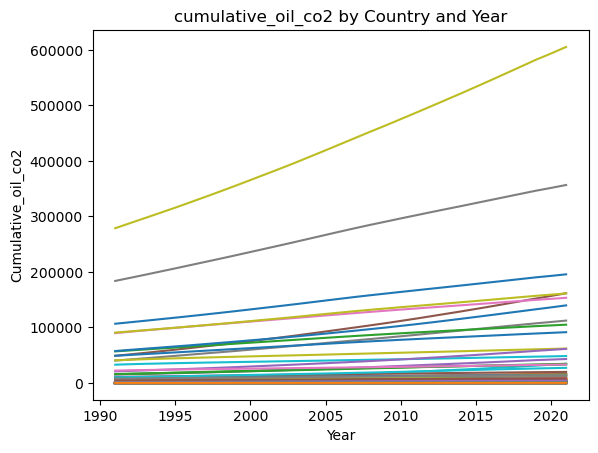

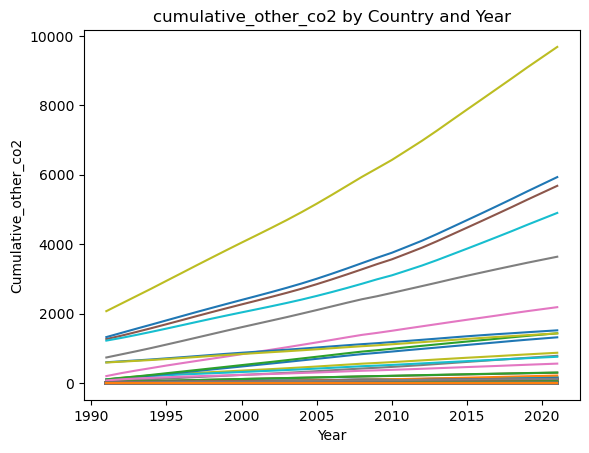

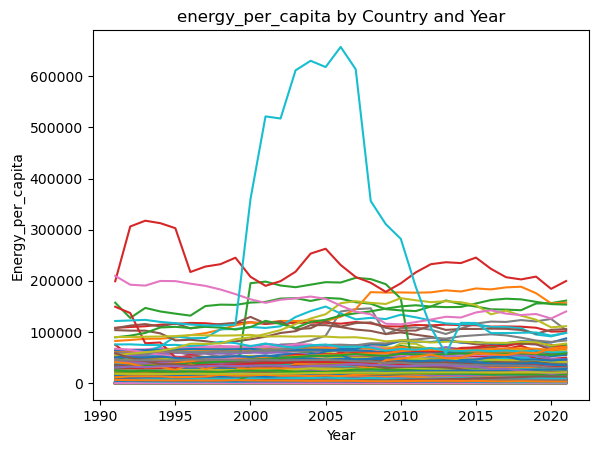

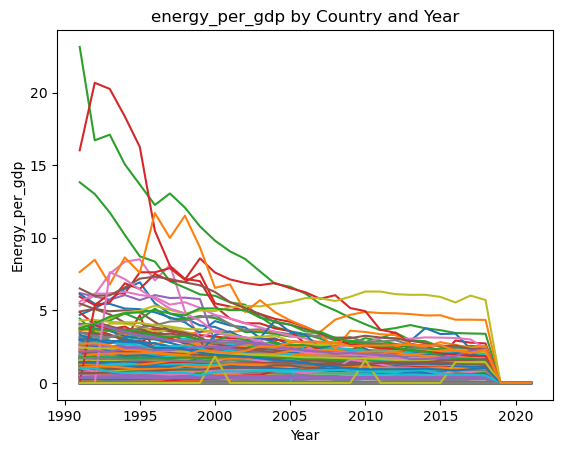

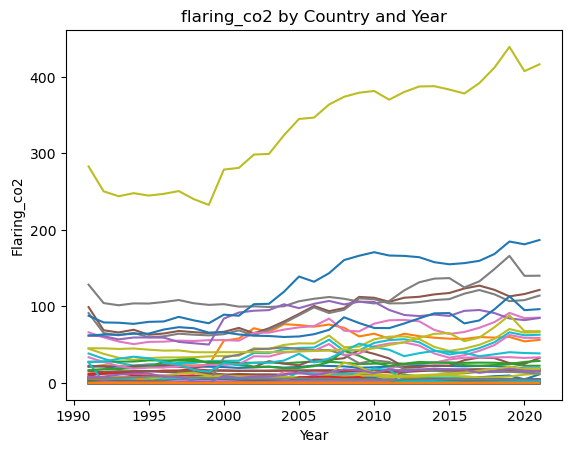

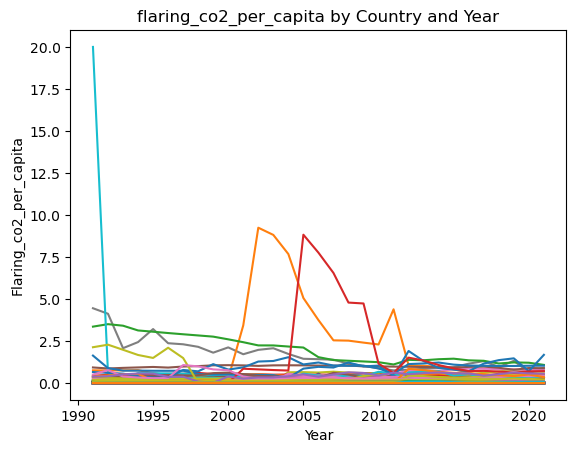

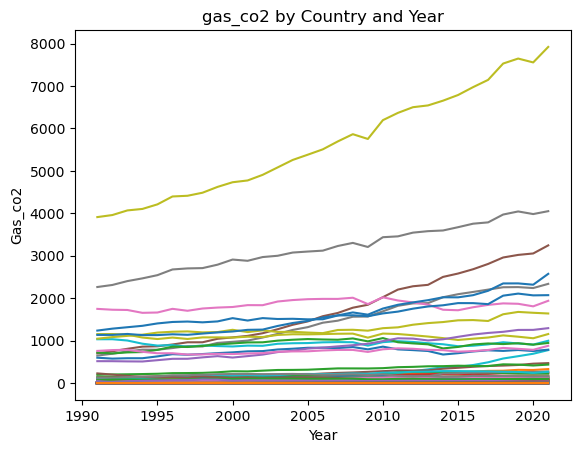

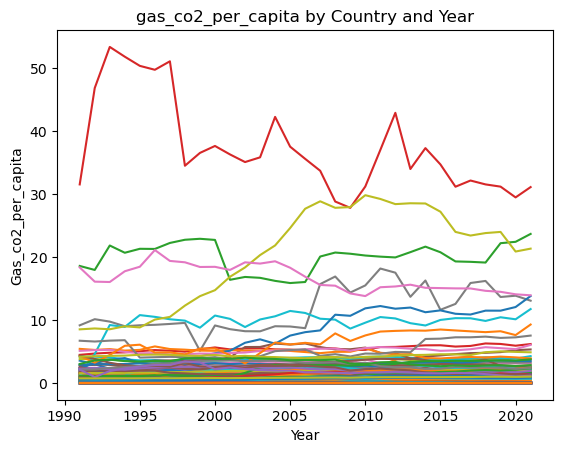

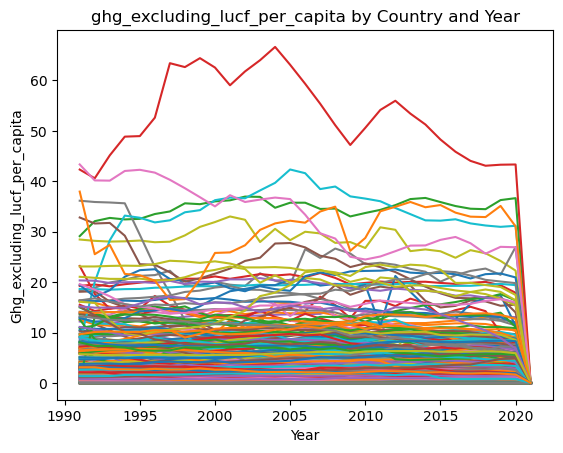

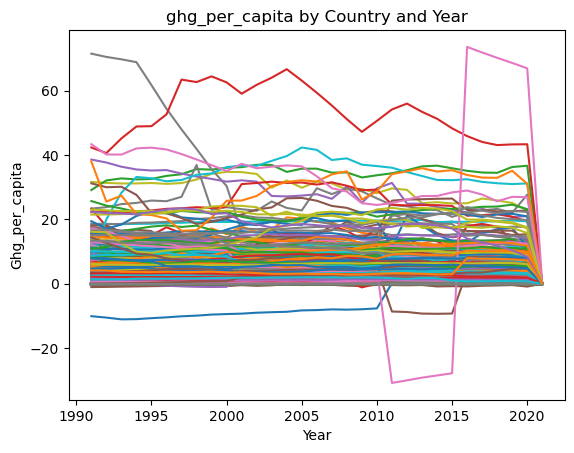

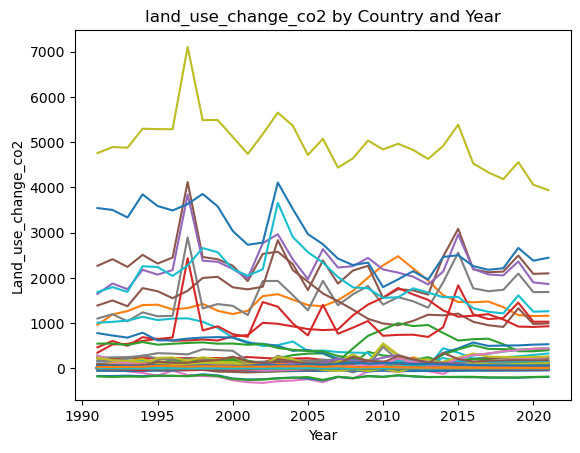

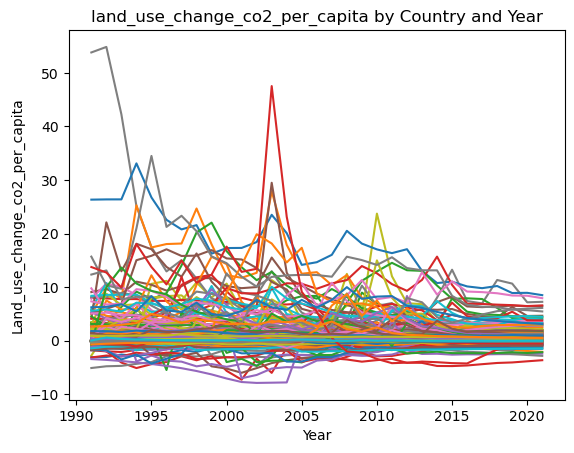

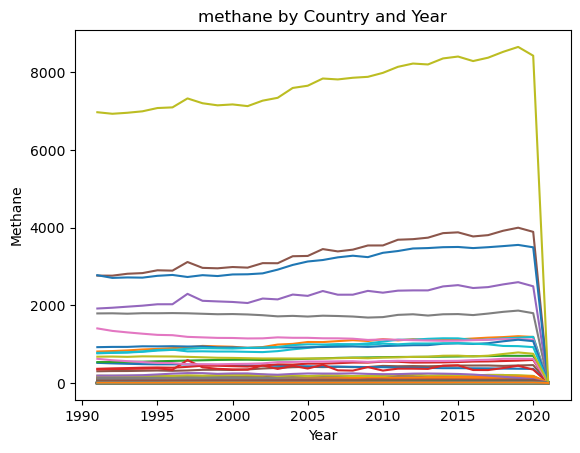

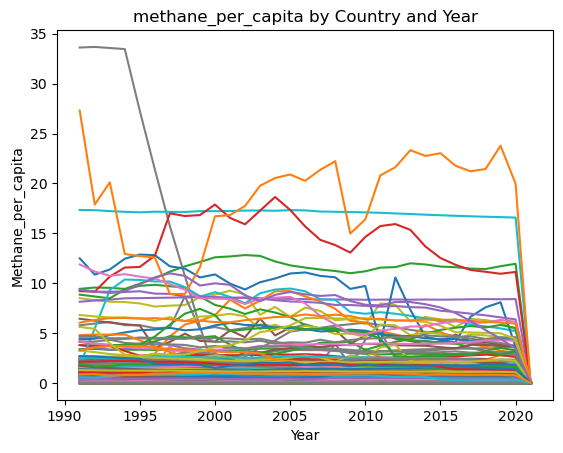

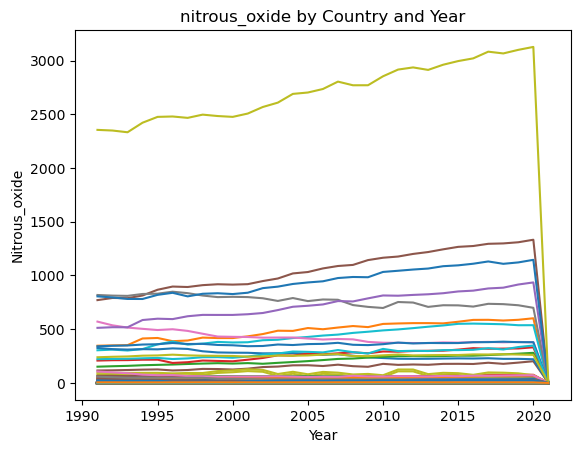

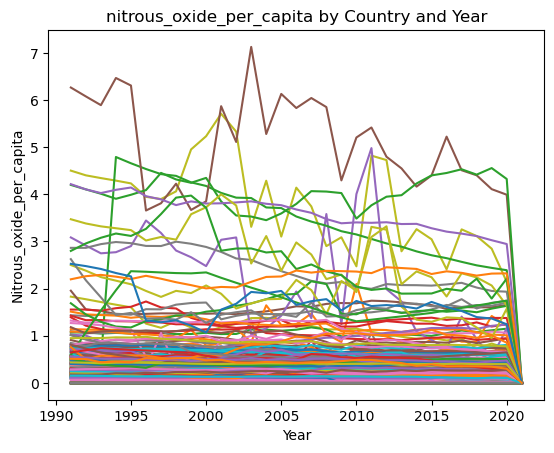

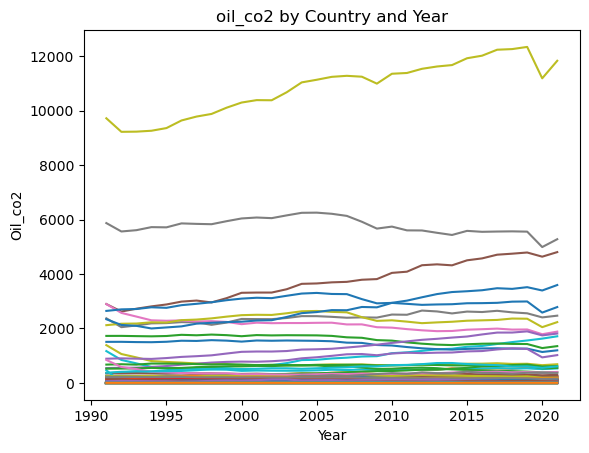

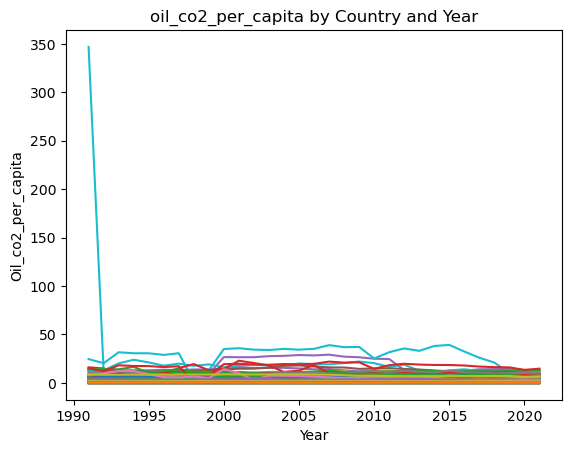

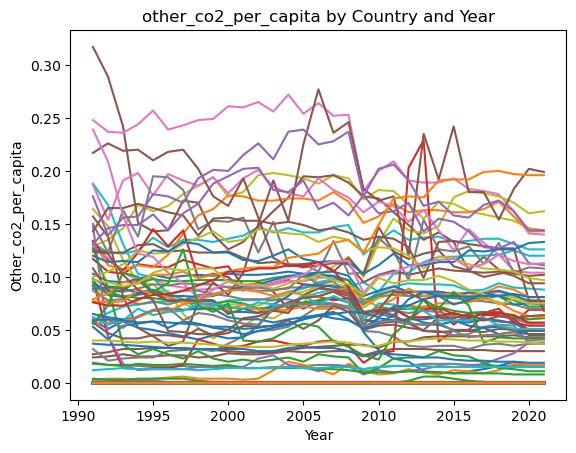

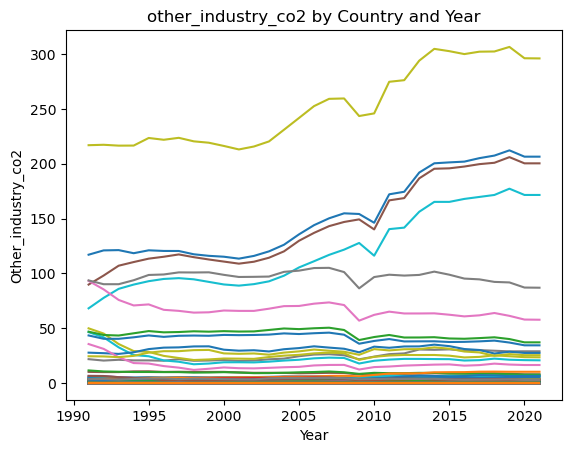

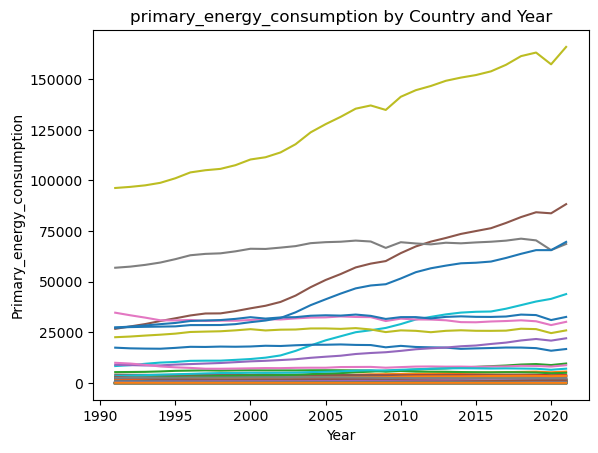

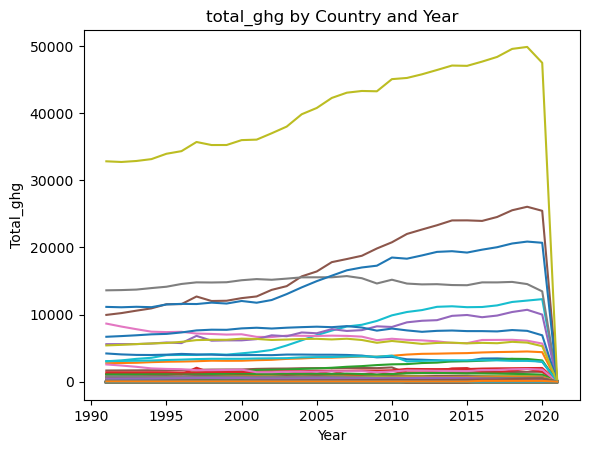

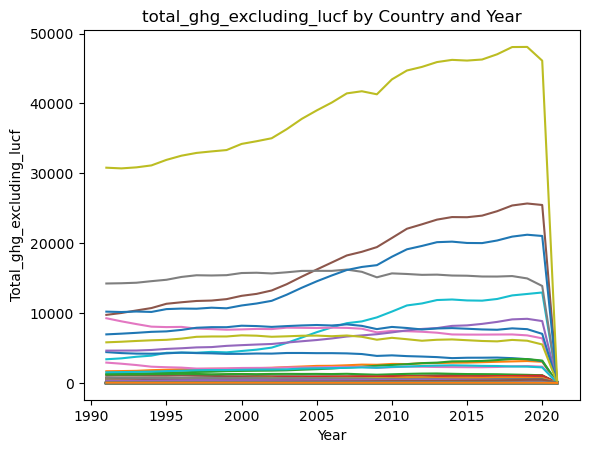

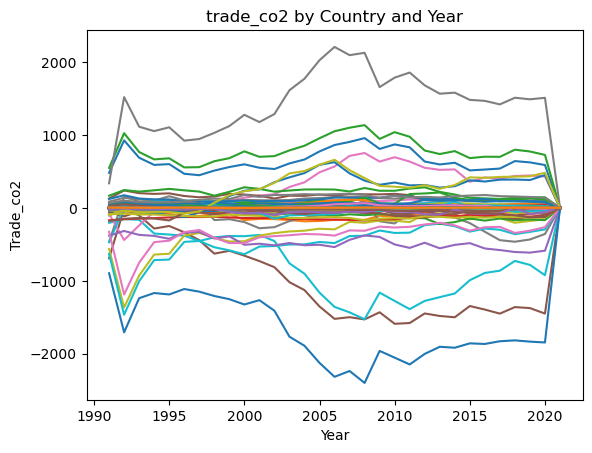

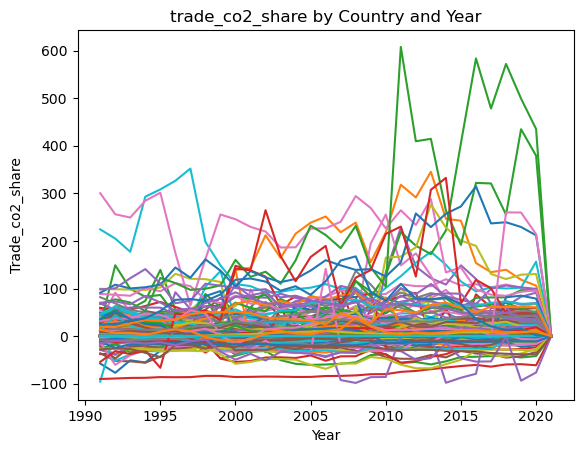

In [40]:
# Do the same for co2 stats and gdp
# ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
#        'cement_co2_per_capita', 'co2', 'co2_including_luc',
#        'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
#        'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
#        'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp',
#        'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita',
#        'consumption_co2', 'consumption_co2_per_capita',
#        'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
#        'cumulative_co2_including_luc', 'cumulative_coal_co2',
#        'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
#        'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
#        'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
#        'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
#        'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
#        'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
#        'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
#        'other_industry_co2', 'primary_energy_consumption', 'total_ghg',
#        'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share']
# All indexes of the gasses dataframe

def create_dataframe( column_to_track : str ) -> pd.DataFrame:
    grouped = filtered_gasses.groupby([ 'country', 'year' ])

    data = [ ]
    for name, group in grouped:
        country, year = name
        coldata = group[ column_to_track ].mean( )
        data.append(( year, country, coldata ))

    return pd.DataFrame( data, columns=[ 'Year', 'Country', column_to_track ]).pivot( index='Year', columns='Country', values=column_to_track )

def graph_gasses_dataframe( df : pd.DataFrame, name : str ):
    df.plot( kind='line' )
    plt.title( f'{ name } by Country and Year' )
    plt.xlabel( 'Year' )
    plt.ylabel( name.capitalize( ) )
    plt.legend( ).remove( )
    plt.show( )

gasses_yearly_data = {
    'population' : populations
}

# Population is index 4, so we want to start from gdp
for colname in gasses.columns[ 4: ]:
    gasses_yearly_data[ colname ] = create_dataframe( colname )
    print( f'Generated historical data for { colname }, access the dataframe with `gasses_yearly_data["{ colname }"]`' )
    
for name, df in gasses_yearly_data.items( ):
    graph_gasses_dataframe( df, name )
    